In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

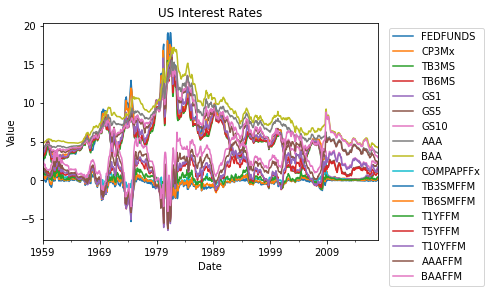

In [19]:
df = pd.read_excel('USInterestRate.xlsx') 
df.head()
df = pd.read_excel('USInterestRate.xlsx', parse_dates=['Date'])

# Set the index of the DataFrame to the date column
df.set_index('Date', inplace=True)

# Plot the DataFrame using Matplotlib
df.plot()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('US Interest Rates')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

In [11]:
import matplotlib.pyplot as plt

In [20]:
X = df.iloc[:, 1:].values

In [21]:
print(X.shape)

(708, 16)


In [32]:
date = df.iloc[:,0]


In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
PC = pca.fit_transform(X)

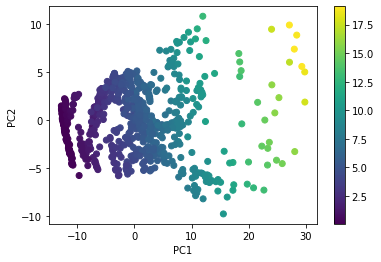

In [26]:
plt.scatter(PC[:,0], PC[:,1], c=date)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()


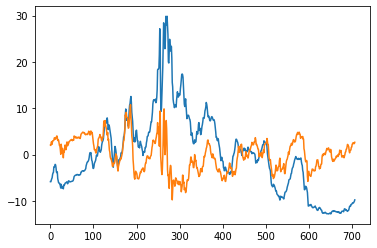

In [59]:
plt.plot(PC)

In [33]:
variance_ratio = pca.explained_variance_ratio_

# Calculate the total percentage of the variance captured by the first two principal components
total_variance = np.sum(variance_ratio[:2])
percent_total_variance = total_variance * 100

print(f'The first two principal components explain {percent_total_variance:.2f}% of the total variance.')






The first two principal components explain 97.40% of the total variance.


In [48]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load data into a NumPy array
# Define the dimensions of the input and latent spaces
input_dim = X.shape[1]
latent_dim = 1

# Define the encoder
inputs = Input(shape=(input_dim,))
encoded = Dense(4, activation='relu')(inputs)
encoded = Dense(2, activation='relu')(encoded)

# Define the decoder
decoded = Dense(4, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

# Define the autoencoder
autoencoder = Model(inputs, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X, X, epochs=100)

# Extract the encoder model for dimensionality reduction
encoder = Model(inputs, encoded)
encoded_X = encoder.predict(X)

# Print the shape of the encoded data
print(encoded_X)


Epoch 1/100
23/23 [==============================] - 0s 1ms/step - loss: 28.3143
Epoch 2/100
23/23 [==============================] - 0s 725us/step - loss: 23.2836
Epoch 3/100
23/23 [==============================] - 0s 725us/step - loss: 21.1593
Epoch 4/100
23/23 [==============================] - 0s 771us/step - loss: 19.5351
Epoch 5/100
23/23 [==============================] - 0s 771us/step - loss: 17.7300
Epoch 6/100
23/23 [==============================] - 0s 725us/step - loss: 15.5805
Epoch 7/100
23/23 [==============================] - 0s 771us/step - loss: 13.2627
Epoch 8/100
23/23 [==============================] - 0s 725us/step - loss: 10.9481
Epoch 9/100
23/23 [==============================] - 0s 725us/step - loss: 8.8934
Epoch 10/100
23/23 [==============================] - 0s 725us/step - loss: 7.1508
Epoch 11/100
23/23 [==============================] - 0s 725us/step - loss: 5.7459
Epoch 12/100
23/23 [==============================] - 0s 725us/step - loss: 4.6018
Epoch 1

23/23 [==============================] - 0s 680us/step - loss: 0.1694
Epoch 100/100
23/23 [==============================] - 0s 589us/step
[[7.0683317 7.174321 ]
 [7.0872445 7.2796364]
 [7.628978  6.76228  ]
 ...
 [2.862761  6.4365635]
 [3.0626862 6.3954186]
 [3.452774  6.2000813]]


In [54]:
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])

# Extract the dates and encoded data from the DataFrame
date = df.iloc[:, 0]

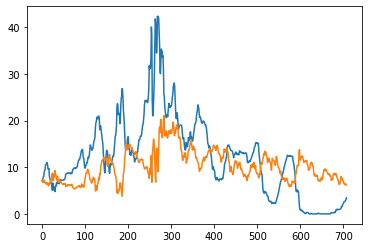

In [58]:

plt.plot(encoded_X)

# Format the dates as 'YYYY-MM-DD'
